In [1]:
import argparse
from collections import defaultdict
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import numpy as np
import pandas as pd
import random
import seaborn as sns
from scipy import linalg
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 14})


In [2]:
outpath = "/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/notebooks/output/plot_sims/"

/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/notebooks/output/plot_sims/exon_skip_twoends_100_100_0.6.png


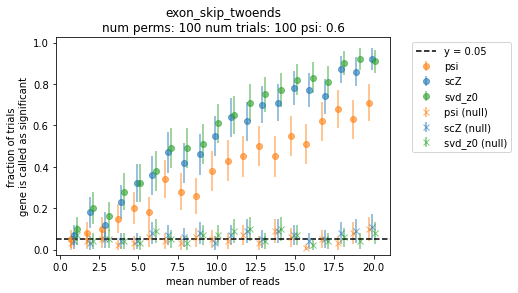

In [5]:
regime = "exon_skip_twoends"
num_perms = 100
num_trials = 100
num_cells = 20
psi = 0.6
sep = 0.2

z_color = {"psi" : u'#ff7f0e', "scZ" : u'#1f77b4', "svd_z0" : u'#2ca02c', "svd_z1" : u'#9467bd', "svd_z2" : u'#8c564b'}
out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi, num_cells),sep="\t")
out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_null_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi,num_cells),sep="\t")

out_df = out_df[out_df["z_col"] != "svd_z2"]
out_df_null = out_df_null[out_df_null["z_col"] != "svd_z2"]

z_cols = ["psi", "scZ", "svd_z0"]

for i in range(len(z_cols)):
  z_col = z_cols[i]
  z_df = out_df[out_df["z_col"] == z_col]
# for z_col, z_df in out_df.groupby("z_col"):
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(i - len(z_cols)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=z_col,marker="o",alpha=0.6,color=z_color[z_col],linestyle="")
  
# for z_col, z_df in out_df_null.groupby("z_col"):
for i in range(len(z_cols)):
  z_col = z_cols[i]
  z_df = out_df_null[out_df_null["z_col"] == z_col]  
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(i - len(z_cols)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=z_col + " (null)",marker="x",alpha=0.6,color=z_color[z_col], linestyle="")

plt.axhline(y=0.05, label="y = 0.05",color="k",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mean number of reads")
plt.ylabel("fraction of trials\ngene is called as significant")
plt.ylim([-.025,1.025])
plt.title("{}\nnum perms: {} num trials: {} psi: {}".format(regime,num_perms, num_trials, psi))
plt.savefig("{}{}_{}_{}_{}.png".format(outpath,regime,num_trials,num_perms,psi),bbox_inches="tight")
print("{}{}_{}_{}_{}.png".format(outpath,regime,num_trials,num_perms,psi))
plt.show()

# CD47-type plot

[(1, 0.265), (2, 0.488), (3, 0.6629999999999999), (4, 0.804), (5, 0.9), (6, 0.95), (7, 0.975), (8, 0.987), (9, 0.996), (10, 0.996)]
[(1, 0.154), (2, 0.319), (3, 0.478), (4, 0.6609999999999999), (5, 0.748), (6, 0.828), (7, 0.861), (8, 0.925), (9, 0.9490000000000001), (10, 0.9670000000000001)]
[(1, 0.21600000000000003), (2, 0.366), (3, 0.517), (4, 0.624), (5, 0.754), (6, 0.846), (7, 0.912), (8, 0.951), (9, 0.9690000000000001), (10, 0.981)]
[(1, 0.109), (2, 0.297), (3, 0.446), (4, 0.585), (5, 0.6809999999999999), (6, 0.736), (7, 0.821), (8, 0.867), (9, 0.912), (10, 0.935)]


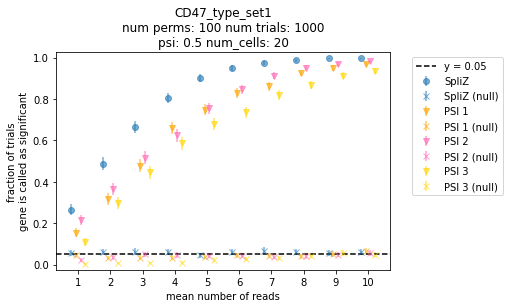

In [4]:
regime = "CD47_type_set1"
num_perms = 100
num_trials = 1000
num_cells = 20
psi = 0.5
sep = 0.15
read_lim = 11
num_cols = 4
z_color = {"psi" : u'#ff7f0e', "scZ" : u'#1f77b4', "svd_z0" : u'#2ca02c', "svd_z1" : u'#9467bd', "svd_z2" : u'#8c564b'}
out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi, num_cells),sep="\t")
out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_null_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi,num_cells),sep="\t")

out_df = out_df[out_df["read_depth"] < read_lim]
out_df_null = out_df_null[out_df_null["read_depth"] < read_lim]
out_df = out_df[out_df["z_col"] != "svd_z2"]
out_df_null = out_df_null[out_df_null["z_col"] != "svd_z2"]
z_cols = [ "scZ"]

label_dict = {"scZ" : "SpliZ","svd_z0" : "SpliZVD"}
seq_dict = {"scZ" : 0, "svd_z0" : 1}
for i in range(len(z_cols)):
  z_col = z_cols[i]
  z_df = out_df[out_df["z_col"] == z_col]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(seq_dict[z_col] - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=label_dict[z_col],marker="o",alpha=0.6,color=z_color[z_col],linestyle="")
  print([(x,y) for x,y in zip(z_df["read_depth"],z_df["power"])])
for i in range(len(z_cols)):
  z_col = z_cols[i]
  z_df = out_df_null[out_df_null["z_col"] == z_col]  
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(seq_dict[z_col] - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=label_dict[z_col] + " (null)",marker="x",alpha=0.6,color=z_color[z_col], linestyle="")
#   print([(x,y) for x,y in zip(z_df["read_depth"],z_df["power"])])
# markers = ["o","v"]
colors = ["orange","hotpink","gold"]
for i in range(1,4):
  out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/CD47_type_set{}_{}_{}_{}_{}.tsv".format(i, num_trials, num_perms, psi, num_cells),sep="\t")
  out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/CD47_type_set{}_null_{}_{}_{}_{}.tsv".format(i, num_trials, num_perms, psi,num_cells),sep="\t")
  out_df = out_df[out_df["read_depth"] < read_lim]
  out_df_null = out_df_null[out_df_null["read_depth"] < read_lim]
  z_df = out_df[out_df["z_col"] == "psi"]
#   out_df_null = out_df_null[out_df_null["z_col"] == "psi"]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(i  - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label="PSI {}".format(i),marker="v",alpha=0.6,color=colors[i-1],linestyle="")
  print([(x,y) for x,y in zip(z_df["read_depth"],z_df["power"])])
  z_df = out_df_null[out_df_null["z_col"] == "psi"]

#   out_df_null = out_df_null[out_df_null["z_col"] == "psi"]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci 
  
  plt.errorbar(z_df["read_depth"] + sep*(i  - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label="PSI {} (null)".format(i),marker="x",alpha=0.6,color=colors[i-1],linestyle="")

plt.axhline(y=0.05, label="y = 0.05",color="k",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mean number of reads")
plt.ylabel("fraction of trials\ngene is called as significant")
plt.ylim([-.025,1.025])
plt.xticks(z_df["read_depth"])
# plt.yticks([x*0.1 for x in range(11)])
plt.title("{}\nnum perms: {} num trials: {}\npsi: {} num_cells: {}".format(regime,num_perms, num_trials, psi, num_cells))
plt.savefig("{}{}_{}_{}_{}_{}.png".format(outpath,regime,num_trials,num_perms,psi,read_lim),bbox_inches="tight")
# print("{}{}_{}_{}_{}_{}_{}.png".format(outpath,regime,num_trials,num_perms,psi, num_cells,read_lim))
plt.show()

In [5]:
print([(x,y) for x,y in zip(z_df["read_depth"],z_df["power"])])

[(1, 0.004), (2, 0.009000000000000001), (3, 0.008), (4, 0.01), (5, 0.024), (6, 0.027000000000000003), (7, 0.031), (8, 0.044000000000000004), (9, 0.057), (10, 0.048)]


# Casset type plot

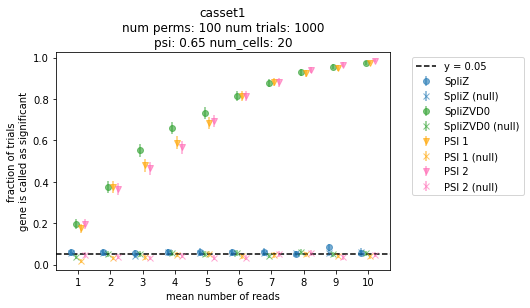

In [6]:
regime = "casset1"
num_perms = 100
num_trials = 1000
num_cells = 20
psi = 0.65
sep = 0.15
read_lim = 11
colors = ["orange","hotpink","gold"]
z_color = {"psi" : u'#ff7f0e', "scZ" : u'#1f77b4', "svd_z0" : u'#2ca02c', "svd_z1" : u'#9467bd', "svd_z2" : u'#8c564b'}
out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi, num_cells),sep="\t")
out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_null_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi,num_cells),sep="\t")
out_df = out_df[out_df["read_depth"] < read_lim]
out_df_null = out_df_null[out_df_null["read_depth"] < read_lim]
out_df = out_df[out_df["z_col"] != "svd_z2"]
out_df_null = out_df_null[out_df_null["z_col"] != "svd_z2"]
z_cols = [ "scZ","svd_z0"]
num_cols = 4
label_dict = {"scZ" : "SpliZ", "svd_z0" : "SpliZVD0", "svd_z1" : "SpliZVD1"}

seq_dict = {"scZ" : 0, "svd_z0" : 1}

for i in range(len(z_cols)):
  z_col = z_cols[i]
  z_df = out_df[out_df["z_col"] == z_col]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(seq_dict[z_col] - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=label_dict[z_col],marker="o",alpha=0.6,color=z_color[z_col],linestyle="")
  
# for i in range(len(z_cols)):
#   z_col = z_cols[i]
  z_df = out_df_null[out_df_null["z_col"] == z_col]  
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(seq_dict[z_col] - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=label_dict[z_col] + " (null)",marker="x",alpha=0.6,color=z_color[z_col], linestyle="")

for i in range(1,3):
  out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/casset{}_{}_{}_{}_{}.tsv".format(i,num_trials, num_perms, psi, num_cells),sep="\t")
  out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/casset{}_null_{}_{}_{}_{}.tsv".format(i,num_trials, num_perms, psi,num_cells),sep="\t")
  out_df = out_df[out_df["read_depth"] < read_lim]
  out_df_null = out_df_null[out_df_null["read_depth"] < read_lim]
  z_df = out_df[out_df["z_col"] == "psi"]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  #   out_df_null = out_df_null[out_df_null["z_col"] == "psi"]

  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(i + 1- (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label="PSI {}".format(i),marker="v",alpha=0.6,color=colors[i-1],linestyle="")  
  z_df = out_df_null[out_df_null["z_col"] == "psi"]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  #   out_df_null = out_df_null[out_df_null["z_col"] == "psi"]

  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(i + 1- (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label="PSI {} (null)".format(i),marker="x",alpha=0.6,color=colors[i-1],linestyle="")  
plt.axhline(y=0.05, label="y = 0.05",color="k",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mean number of reads")
plt.ylabel("fraction of trials\ngene is called as significant")

plt.ylim([-.025,1.025])
plt.xticks(z_df["read_depth"])
plt.title("{}\nnum perms: {} num trials: {}\npsi: {} num_cells: {}".format(regime,num_perms, num_trials, psi, num_cells))
plt.savefig("{}{}_{}_{}_{}_{}_{}.png".format(outpath,regime,num_trials,num_perms,psi, num_cells,read_lim),bbox_inches="tight")
plt.show()

## Exon skip

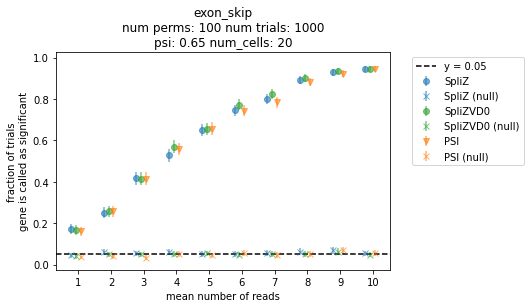

In [7]:
regime = "exon_skip"
num_perms = 100
num_trials = 1000
num_cells = 20
psi = 0.65
sep = 0.15
read_lim = 11
colors = ["orange","hotpink","gold"]
z_color = {"psi" : u'#ff7f0e', "scZ" : u'#1f77b4', "svd_z0" : u'#2ca02c', "svd_z1" : u'#9467bd', "svd_z2" : u'#8c564b'}
out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi, num_cells),sep="\t")
out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_null_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi,num_cells),sep="\t")
out_df = out_df[out_df["read_depth"] < read_lim]
out_df_null = out_df_null[out_df_null["read_depth"] < read_lim]
out_df = out_df[out_df["z_col"] != "svd_z2"]
out_df_null = out_df_null[out_df_null["z_col"] != "svd_z2"]
z_cols = [ "scZ","svd_z0","psi"]
num_cols = 4
label_dict = {"scZ" : "SpliZ", "svd_z0" : "SpliZVD0", "svd_z1" : "SpliZVD1","psi" : "PSI"}

seq_dict = {"scZ" : 0, "svd_z0" : 1,"psi" : 2}
marker_dict = {"scZ" : "o", "svd_z0" : "o", "psi" : "v"}
for i in range(len(z_cols)):
  z_col = z_cols[i]
  z_df = out_df[out_df["z_col"] == z_col]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(seq_dict[z_col] - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=label_dict[z_col],marker=marker_dict[z_col],alpha=0.6,color=z_color[z_col],linestyle="")
  
# for i in range(len(z_cols)):
#   z_col = z_cols[i]
  z_df = out_df_null[out_df_null["z_col"] == z_col]  
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(seq_dict[z_col] - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=label_dict[z_col] + " (null)",marker="x",alpha=0.6,color=z_color[z_col], linestyle="")

# for i in range(1,3):
#   out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/casset{}_{}_{}_{}_{}.tsv".format(i,num_trials, num_perms, psi, num_cells),sep="\t")
#   out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/casset{}_null_{}_{}_{}_{}.tsv".format(i,num_trials, num_perms, psi,num_cells),sep="\t")
#   out_df = out_df[out_df["read_depth"] < read_lim]
#   out_df_null = out_df_null[out_df_null["read_depth"] < read_lim]
#   z_df = out_df[out_df["z_col"] == "psi"]
#   lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
#   #   out_df_null = out_df_null[out_df_null["z_col"] == "psi"]

#   z_df["lower_ci"] = lower_ci
#   z_df["upper_ci"] = upper_ci

#   plt.errorbar(z_df["read_depth"] + sep*(i + 1- (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label="PSI {}".format(i),marker="v",alpha=0.6,color=colors[i-1],linestyle="")  
#   z_df = out_df_null[out_df_null["z_col"] == "psi"]
#   lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
#   #   out_df_null = out_df_null[out_df_null["z_col"] == "psi"]

#   z_df["lower_ci"] = lower_ci
#   z_df["upper_ci"] = upper_ci

#   plt.errorbar(z_df["read_depth"] + sep*(i + 1- (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label="PSI {} (null)".format(i),marker="x",alpha=0.6,color=colors[i-1],linestyle="")  
plt.axhline(y=0.05, label="y = 0.05",color="k",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mean number of reads")
plt.ylabel("fraction of trials\ngene is called as significant")

plt.ylim([-.025,1.025])
plt.xticks(z_df["read_depth"])
plt.title("{}\nnum perms: {} num trials: {}\npsi: {} num_cells: {}".format(regime,num_perms, num_trials, psi, num_cells))
plt.savefig("{}{}_{}_{}_{}_{}_{}.png".format(outpath,regime,num_trials,num_perms,psi, num_cells,read_lim),bbox_inches="tight")
plt.show()

## Constitutive splicing

[(1, 0.12), (2, 0.19), (3, 0.32), (4, 0.51), (5, 0.55), (6, 0.74), (7, 0.71), (8, 0.81), (9, 0.9), (10, 0.88), (11, 0.96), (12, 0.97), (13, 1.0), (14, 0.97), (15, 0.98), (16, 1.0), (17, 1.0), (18, 0.99), (19, 0.98), (20, 0.98)]
[(1, 0.14), (2, 0.15), (3, 0.29), (4, 0.37), (5, 0.37), (6, 0.4), (7, 0.41), (8, 0.35), (9, 0.48), (10, 0.35), (11, 0.37), (12, 0.47), (13, 0.39), (14, 0.48), (15, 0.42), (16, 0.62), (17, 0.58), (18, 0.59), (19, 0.52), (20, 0.68)]
[(1, 0.16), (2, 0.12), (3, 0.23), (4, 0.35), (5, 0.41), (6, 0.43), (7, 0.62), (8, 0.68), (9, 0.71), (10, 0.7), (11, 0.81), (12, 0.83), (13, 0.84), (14, 0.92), (15, 0.91), (16, 0.93), (17, 0.93), (18, 0.97), (19, 0.97), (20, 0.99)]
[(1, 0.1), (2, 0.17), (3, 0.23), (4, 0.26), (5, 0.35), (6, 0.55), (7, 0.6), (8, 0.63), (9, 0.71), (10, 0.74), (11, 0.74), (12, 0.8), (13, 0.83), (14, 0.92), (15, 0.93), (16, 0.93), (17, 0.93), (18, 0.92), (19, 0.95), (20, 0.96)]
[(1, 0.07), (2, 0.24), (3, 0.24), (4, 0.28), (5, 0.36), (6, 0.41), (7, 0.56), (8,

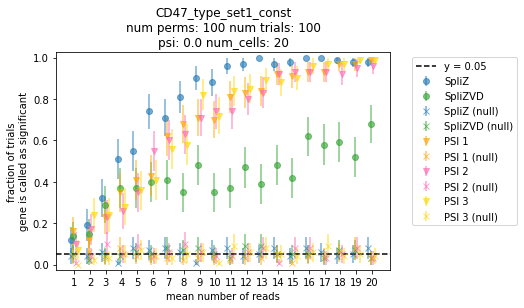

In [4]:
regime = "CD47_type_set1_const"
num_perms = 100
num_trials = 100
num_cells = 20
psi = 0.0
sep = 0.15
read_lim = 21
num_cols = 4
z_color = {"psi" : u'#ff7f0e', "scZ" : u'#1f77b4', "svd_z0" : u'#2ca02c', "svd_z1" : u'#9467bd', "svd_z2" : u'#8c564b'}
out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi, num_cells),sep="\t")
out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/{}_null_{}_{}_{}_{}.tsv".format(regime, num_trials, num_perms, psi,num_cells),sep="\t")

out_df = out_df[out_df["read_depth"] < read_lim]
out_df_null = out_df_null[out_df_null["read_depth"] < read_lim]
out_df = out_df[out_df["z_col"] != "svd_z2"]
out_df_null = out_df_null[out_df_null["z_col"] != "svd_z2"]
z_cols = [ "scZ","svd_z0"]

label_dict = {"scZ" : "SpliZ","svd_z0" : "SpliZVD"}
seq_dict = {"scZ" : 0, "svd_z0" : 1}
for i in range(len(z_cols)):
  z_col = z_cols[i]
  z_df = out_df[out_df["z_col"] == z_col]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(seq_dict[z_col] - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=label_dict[z_col],marker="o",alpha=0.6,color=z_color[z_col],linestyle="")
  print([(x,y) for x,y in zip(z_df["read_depth"],z_df["power"])])
for i in range(len(z_cols)):
  z_col = z_cols[i]
  z_df = out_df_null[out_df_null["z_col"] == z_col]  
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(seq_dict[z_col] - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label=label_dict[z_col] + " (null)",marker="x",alpha=0.6,color=z_color[z_col], linestyle="")
#   print([(x,y) for x,y in zip(z_df["read_depth"],z_df["power"])])
# markers = ["o","v"]
colors = ["orange","hotpink","gold"]
for i in range(1,4):
  out_df = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/CD47_type_set{}_{}_{}_{}_{}.tsv".format(i, num_trials, num_perms, psi, num_cells),sep="\t")
  out_df_null = pd.read_csv("/scratch/PI/horence/JuliaO/single_cell/Differential_Splicing/scripts/output/power_simulation/CD47_type_set{}_null_{}_{}_{}_{}.tsv".format(i, num_trials, num_perms, psi,num_cells),sep="\t")
  out_df = out_df[out_df["read_depth"] < read_lim]
  out_df_null = out_df_null[out_df_null["read_depth"] < read_lim]
  z_df = out_df[out_df["z_col"] == "psi"]
#   out_df_null = out_df_null[out_df_null["z_col"] == "psi"]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci

  plt.errorbar(z_df["read_depth"] + sep*(i  - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label="PSI {}".format(i),marker="v",alpha=0.6,color=colors[i-1],linestyle="")
  print([(x,y) for x,y in zip(z_df["read_depth"],z_df["power"])])
  z_df = out_df_null[out_df_null["z_col"] == "psi"]

#   out_df_null = out_df_null[out_df_null["z_col"] == "psi"]
  lower_ci, upper_ci = proportion_confint(z_df["num_sig"], z_df["num_trials"])
  z_df["lower_ci"] = lower_ci
  z_df["upper_ci"] = upper_ci 
  
  plt.errorbar(z_df["read_depth"] + sep*(i  - (num_cols-1)/2),z_df["power"],yerr=[z_df["power"] - z_df["lower_ci"], z_df["upper_ci"] - z_df["power"]],label="PSI {} (null)".format(i),marker="x",alpha=0.6,color=colors[i-1],linestyle="")

plt.axhline(y=0.05, label="y = 0.05",color="k",linestyle="--")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("mean number of reads")
plt.ylabel("fraction of trials\ngene is called as significant")
plt.ylim([-.025,1.025])
plt.xticks(z_df["read_depth"])
# plt.yticks([x*0.1 for x in range(11)])
plt.title("{}\nnum perms: {} num trials: {}\npsi: {} num_cells: {}".format(regime,num_perms, num_trials, psi, num_cells))
plt.savefig("{}{}_{}_{}_{}_{}.png".format(outpath,regime,num_trials,num_perms,psi,read_lim),bbox_inches="tight")
# print("{}{}_{}_{}_{}_{}_{}.png".format(outpath,regime,num_trials,num_perms,psi, num_cells,read_lim))
plt.show()